In [211]:
import pandas as pd
import numpy as np

In [212]:
df = pd.read_csv('Entrenamiento_1.csv')

In [213]:
df.head()

,Unnamed: 0,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Approval","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,...,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,0,27761,EMEA,None,True,True,True,True,False,Bureaucratic_Code_4,...,2016-05-01,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,1,27760,EMEA,None,False,False,False,False,False,Bureaucratic_Code_4,...,2016-01-01,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,2,27446,Americas,NW America,False,False,False,False,False,Bureaucratic_Code_4,...,2016-01-01,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,3,16808,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,...,2018-02-01,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,4,16805,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,...,2018-02-01,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [246]:
productos = df[['Product_Type','Size']]
productos.head()

,Product_Type,Size
0,None,None
1,None,None
2,None,None
3,Product_Type_0,Size_4
4,Product_Type_0,Size_4


In [247]:
productos = productos[(productos['Product_Type'].astype('str') != 'None')]
productos

,Product_Type,Size
3,Product_Type_0,Size_4
4,Product_Type_0,Size_4
5,Product_Type_0,Size_4
579,Other,Other
580,Other,Other
...,...,...
16055,Product_Type_1,Size_3
16060,Product_Type_1,Size_4
16061,Product_Type_1,Size_4
16104,Product_Type_2,Size_3


In [248]:
productos['Product_Type'].value_counts()

Other             515
Product_Type_3    179
Product_Type_1    142
Product_Type_0     94
Product_Type_4     73
Product_Type_2      9
Name: Product_Type, dtype: int64

In [249]:
productos['Size'].value_counts()

Other     389
Size_3    354
Size_4    189
None       46
Size_1     25
Size_0      7
Size_2      2
Name: Size, dtype: int64

In [333]:
productosYtamanios =productos.groupby(['Product_Type','Size']).agg({'Size':['count']})
productosYtamanios

Size
                      count
Product_Type   Size        
Other          None      40
               Other    357
               Size_0     2
               Size_3    68
               Size_4    48
Product_Type_0 None       1
               Other      3
               Size_3    64
               Size_4    26
Product_Type_1 None       1
               Other      8
               Size_0     5
               Size_1    16
               Size_3    78
               Size_4    34
Product_Type_2 Other      4
               Size_3     3
               Size_4     2
Product_Type_3 None       3
               Other     10
               Size_1     3
               Size_2     2
               Size_3   101
               Size_4    60
Product_Type_4 None       1
               Other      7
               Size_1     6
               Size_3    40
               Size_4    19

In [334]:
productosYtamanios =productosYtamanios.unstack()
productosYtamanios.head()

Size                                          
               count                                          
Size            None  Other Size_0 Size_1 Size_2 Size_3 Size_4
Product_Type                                                  
Other           40.0  357.0    2.0    NaN    NaN   68.0   48.0
Product_Type_0   1.0    3.0    NaN    NaN    NaN   64.0   26.0
Product_Type_1   1.0    8.0    5.0   16.0    NaN   78.0   34.0
Product_Type_2   NaN    4.0    NaN    NaN    NaN    3.0    2.0
Product_Type_3   3.0   10.0    NaN    3.0    2.0  101.0   60.0

In [335]:
level1 = productosYtamanios.columns.get_level_values(1)
level2 = productosYtamanios.columns.get_level_values(2)
productosYtamanios.columns= level1 + '_' + level2
productosYtamanios =productosYtamanios.reset_index()
productosYtamanios.head()

,Product_Type,count_None,count_Other,count_Size_0,count_Size_1,count_Size_2,count_Size_3,count_Size_4
0,Other,40.0,357.0,2.0,NaN,NaN,68.0,48.0
1,Product_Type_0,1.0,3.0,NaN,NaN,NaN,64.0,26.0
2,Product_Type_1,1.0,8.0,5.0,16.0,NaN,78.0,34.0
3,Product_Type_2,NaN,4.0,NaN,NaN,NaN,3.0,2.0
4,Product_Type_3,3.0,10.0,NaN,3.0,2.0,101.0,60.0


In [336]:
productosYtamanios =productosYtamanios.fillna(0)
productosYtamanios.head()

,Product_Type,count_None,count_Other,count_Size_0,count_Size_1,count_Size_2,count_Size_3,count_Size_4
0,Other,40.0,357.0,2.0,0.0,0.0,68.0,48.0
1,Product_Type_0,1.0,3.0,0.0,0.0,0.0,64.0,26.0
2,Product_Type_1,1.0,8.0,5.0,16.0,0.0,78.0,34.0
3,Product_Type_2,0.0,4.0,0.0,0.0,0.0,3.0,2.0
4,Product_Type_3,3.0,10.0,0.0,3.0,2.0,101.0,60.0


In [337]:
productosYtamanios = productosYtamanios.drop(0,axis=0)
productosYtamanios = productosYtamanios.drop(['count_None'],axis=1)

productosYtamanios.head()

,Product_Type,count_Other,count_Size_0,count_Size_1,count_Size_2,count_Size_3,count_Size_4
1,Product_Type_0,3.0,0.0,0.0,0.0,64.0,26.0
2,Product_Type_1,8.0,5.0,16.0,0.0,78.0,34.0
3,Product_Type_2,4.0,0.0,0.0,0.0,3.0,2.0
4,Product_Type_3,10.0,0.0,3.0,2.0,101.0,60.0
5,Product_Type_4,7.0,0.0,6.0,0.0,40.0,19.0


In [378]:
productosYtamanios.columns=["Product_Type","Other","Size_0","Size_1","Size_2","Size_3","Size_4"]
productosYtamanios=productosYtamanios[["Product_Type","Size_0","Size_1","Size_2","Size_3","Size_4","Other"]]
productosYtamanios.head()

,Product_Type,Size_0,Size_1,Size_2,Size_3,Size_4,Other
1,Product_Type_0,0.0,0.0,0.0,64.0,26.0,3.0
2,Product_Type_1,5.0,16.0,0.0,78.0,34.0,8.0
3,Product_Type_2,0.0,0.0,0.0,3.0,2.0,4.0
4,Product_Type_3,0.0,3.0,2.0,101.0,60.0,10.0
5,Product_Type_4,0.0,6.0,0.0,40.0,19.0,7.0


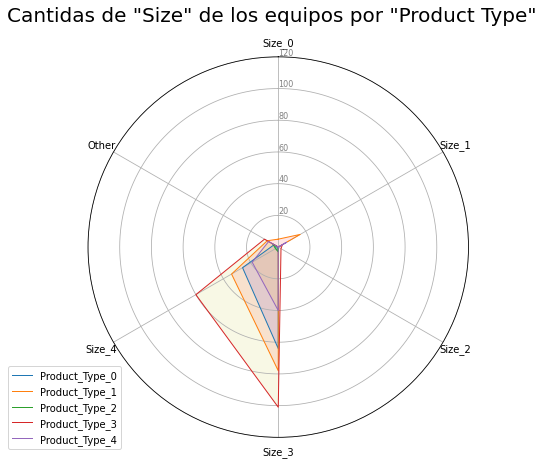

In [381]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

fig=plt.figure(figsize=(7,7))
 
categories=list(productosYtamanios)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)
plt.yticks([20,40,60,80,100,120],["20","40","60","80","100","120"], color="grey", size=8)
plt.ylim(0,120)
 
#tipo 0
values=productosYtamanios.loc[1].drop('Product_Type').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Product_Type_0")
ax.fill(angles, values, 'b', alpha=0.1)
 
#tipo 1
values=productosYtamanios.loc[2].drop('Product_Type').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Product_Type_1")
ax.fill(angles, values, 'r', alpha=0.1)

#tipo 2
values=productosYtamanios.loc[3].drop('Product_Type').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Product_Type_2")
ax.fill(angles, values, 'c', alpha=1)

#tipo 3
values=productosYtamanios.loc[4].drop('Product_Type').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Product_Type_3")
ax.fill(angles, values, 'y', alpha=0.1)

#tipo 4
values=productosYtamanios.loc[5].drop('Product_Type').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Product_Type_4")
ax.fill(angles, values, 'orange', alpha=0.1)

plt.suptitle('Cantidas de "Size" de los equipos por "Product Type"', fontsize=20)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.2));

